# PMAFI - Prospective analysis of the collected sessions

In this notebook we initially analyze the data generated during the recorded video-session. A count-based validation is carried out along with a visualizaton of the sessions.

In [1]:
import pandas as pd
import numpy as np
import json
import requests
from datetime import datetime, timedelta

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline 

## 1. Read data from server

In [2]:
sessions_json = json.loads(requests.get("https://recoface-2e369.firebaseio.com/sessions.json").text)

In [3]:
sessions_json

{'2020-11-30': {'10:01:05:339': {'event': 'front',
   'user': '20YmnmPfd0Y7YSE9WgXxK2zH9BL2'},
  '10:01:06:147': {'event': 'neutral', 'user': '20YmnmPfd0Y7YSE9WgXxK2zH9BL2'},
  '10:01:06:149': {'event': 'move', 'user': '20YmnmPfd0Y7YSE9WgXxK2zH9BL2'},
  '10:01:07:165': {'event': 'front', 'user': '20YmnmPfd0Y7YSE9WgXxK2zH9BL2'},
  '10:01:19:183': {'event': 'move', 'user': '20YmnmPfd0Y7YSE9WgXxK2zH9BL2'},
  '10:01:20:173': {'event': 'front', 'user': '20YmnmPfd0Y7YSE9WgXxK2zH9BL2'},
  '10:01:47:177': {'event': 'move', 'user': '20YmnmPfd0Y7YSE9WgXxK2zH9BL2'},
  '10:01:48:179': {'event': 'front', 'user': '20YmnmPfd0Y7YSE9WgXxK2zH9BL2'},
  '10:01:52:166': {'event': 'move', 'user': '20YmnmPfd0Y7YSE9WgXxK2zH9BL2'},
  '10:01:55:167': {'event': 'front', 'user': '20YmnmPfd0Y7YSE9WgXxK2zH9BL2'},
  '10:02:19:180': {'event': 'surprised',
   'user': '20YmnmPfd0Y7YSE9WgXxK2zH9BL2'},
  '10:02:19:194': {'event': 'move', 'user': '20YmnmPfd0Y7YSE9WgXxK2zH9BL2'},
  '10:02:30:180': {'event': 'front', 'user'

## 2. Convert to dataframe

In [4]:
actions= []

for day in sessions_json.keys():
    day_sessions= sessions_json[day]
    for t in day_sessions.keys():
        action = day_sessions[t]
        event = action['event']
        user = action['user']
        timestamp = datetime. strptime('{} {}'.format(day,t), '%Y-%m-%d %H:%M:%S:%f')
    
        actions.append((0, timestamp, user, event))
        
df_= pd.DataFrame.from_records(actions, columns='session_id timestamp user action'.split())
df_['timestamp']= pd.to_datetime(df_['timestamp'], format='%Y-%m-%d %H:%M:%S:%f')


In [5]:
df_= df_.sort_values('timestamp')

---------------------------------------------

*Edit the threshold to split sessions.*

In [6]:
time_threshold = 60 #in minutes

----------------------------------------------

In [7]:
nsessions_per_user ={}
prev_timestamp_per_user = {}
for i in df_.index:
    r = df_.loc[i]
    user = r['user']
    timestamp = r['timestamp']
    session= nsessions_per_user.get(user,0)
    prev_timestamp= prev_timestamp_per_user.get(user,None) 
    if prev_timestamp:
        time_diff_in_min = (timestamp - prev_timestamp).total_seconds()/60
        if time_diff_in_min > time_threshold:
            #print(user, time_diff_in_min, time_threshold)
            session +=1
    df_.loc[i,'session_id']=session
    prev_timestamp_per_user[user] = timestamp
    nsessions_per_user[user]=session    

## 3. Inspect the dataframe

First rows of the dataframe

In [8]:
df_.head()

,session_id,timestamp,user,action
3790,0,2020-11-30 01:00:00.450,L6BaTzTY5AOuDbvyHAkIgAfq6yt1,angry
3791,0,2020-11-30 01:00:00.519,L6BaTzTY5AOuDbvyHAkIgAfq6yt1,front
3792,0,2020-11-30 01:00:01.127,L6BaTzTY5AOuDbvyHAkIgAfq6yt1,happy
3793,0,2020-11-30 01:00:01.140,L6BaTzTY5AOuDbvyHAkIgAfq6yt1,move
3794,0,2020-11-30 01:00:01.442,L6BaTzTY5AOuDbvyHAkIgAfq6yt1,front


Last rows of the dataframe

In [9]:
df_.tail()

,session_id,timestamp,user,action
50674,1,2021-04-16 20:13:03.172,sbXzlyk91EPaT9pIpne7PCBEJsE3,neutral
50675,1,2021-04-16 20:13:04.180,sbXzlyk91EPaT9pIpne7PCBEJsE3,disgusted
50676,1,2021-04-16 20:13:04.181,sbXzlyk91EPaT9pIpne7PCBEJsE3,front
50677,1,2021-04-16 20:13:05.177,sbXzlyk91EPaT9pIpne7PCBEJsE3,move
50678,1,2021-04-16 20:13:05.190,sbXzlyk91EPaT9pIpne7PCBEJsE3,out


In [10]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50679 entries, 3790 to 50678
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   session_id  50679 non-null  int64         
 1   timestamp   50679 non-null  datetime64[ns]
 2   user        50679 non-null  object        
 3   action      50679 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 4.4+ MB


### Emotions and actions included in all the sessions

In [11]:
print(f"All the registered emotions/actions are {df_['action'].unique()}")

All the registered emotions/actions are ['angry' 'front' 'happy' 'move' 'hit' 'end' 'start' 'out' 'neutral' 'sad'
 'surprised' 'fearful' 'disgusted' 'Theory' 'Practice' 'Doubts'
 'NonAcInfo' 'AcInfo']


### Users included in all the sessions

In [12]:
nusers = df_['user'].nunique()
print(f"The number of users is {nusers}")

The number of users is 10


In [13]:
users_lst = [u+'\n' for u in df_['user'].unique()]
print(f"The list of all users in the system is: {users_lst}")

The list of all users in the system is: ['L6BaTzTY5AOuDbvyHAkIgAfq6yt1\n', '20YmnmPfd0Y7YSE9WgXxK2zH9BL2\n', 'i4L9mnNc9gec7ZW1pAbn1JGk5cm1\n', 'UgYODV0Eo2dywm0OTm1twMYNDoL2\n', 'C0kiehExWQV0FVQGP7tU2bKUQws1\n', 'fOzH7QegbIdZ4tzwiVXKaeehYTD3\n', 'iwWrrzzmzDgc5X6Y1Ob0QhZLvXo1\n', 'MWMEENo7sGWbrlVrVhfT1YNE78b2\n', 'q5GbarKftvP4hdXaZ4IgRDdD1zm2\n', 'sbXzlyk91EPaT9pIpne7PCBEJsE3\n']


### Sessions per user

In [14]:
for u in df_['user'].unique():
    user_df = df_[df_['user']==u]
    nsessions = user_df['session_id'].nunique()
    print(f'User {u} has {nsessions} sessions.')
                  

User L6BaTzTY5AOuDbvyHAkIgAfq6yt1 has 14 sessions.
User 20YmnmPfd0Y7YSE9WgXxK2zH9BL2 has 5 sessions.
User i4L9mnNc9gec7ZW1pAbn1JGk5cm1 has 3 sessions.
User UgYODV0Eo2dywm0OTm1twMYNDoL2 has 7 sessions.
User C0kiehExWQV0FVQGP7tU2bKUQws1 has 4 sessions.
User fOzH7QegbIdZ4tzwiVXKaeehYTD3 has 14 sessions.
User iwWrrzzmzDgc5X6Y1Ob0QhZLvXo1 has 1 sessions.
User MWMEENo7sGWbrlVrVhfT1YNE78b2 has 1 sessions.
User q5GbarKftvP4hdXaZ4IgRDdD1zm2 has 2 sessions.
User sbXzlyk91EPaT9pIpne7PCBEJsE3 has 2 sessions.


In [15]:
session_stats = []
for u in df_['user'].unique():
    user_df = df_[df_['user']==u]
    for s in user_df['session_id'].unique():
        user_session_df = user_df[user_df['session_id']==s]
        start = user_session_df.iloc[0]['timestamp']
        end = user_session_df.iloc[-1]['timestamp']
        session_stats.append((u,s,start,end, round((end-start).total_seconds()/60,1)))
        
session_stats_df = pd.DataFrame.from_records(session_stats, columns='user session_id start end duration(m)'.split())


Statistics of the sessions

In [16]:
session_stats_df

,user,session_id,start,end,duration(m)
0,L6BaTzTY5AOuDbvyHAkIgAfq6yt1,0,2020-11-30 01:00:00.450,2020-11-30 01:14:07.382,14.1
1,L6BaTzTY5AOuDbvyHAkIgAfq6yt1,1,2020-11-30 12:50:21.823,2020-11-30 12:59:59.636,9.6
2,L6BaTzTY5AOuDbvyHAkIgAfq6yt1,2,2020-12-12 23:54:49.132,2020-12-12 23:57:35.290,2.8
3,L6BaTzTY5AOuDbvyHAkIgAfq6yt1,3,2020-12-13 01:16:06.411,2020-12-13 02:06:34.117,50.5
4,L6BaTzTY5AOuDbvyHAkIgAfq6yt1,4,2020-12-17 00:52:20.467,2020-12-17 03:18:05.391,145.7
5,L6BaTzTY5AOuDbvyHAkIgAfq6yt1,5,2020-12-17 13:15:45.789,2020-12-17 13:29:32.610,13.8
6,L6BaTzTY5AOuDbvyHAkIgAfq6yt1,6,2020-12-17 15:52:50.525,2020-12-17 16:01:19.283,8.5
7,L6BaTzTY5AOuDbvyHAkIgAfq6yt1,7,2020-12-18 17:43:05.750,2020-12-18 17:50:47.905,7.7
8,L6BaTzTY5AOuDbvyHAkIgAfq6yt1,8,2021-01-11 16:35:52.219,2021-01-11 16:38:43.417,2.9
9,L6BaTzTY5AOuDbvyHAkIgAfq6yt1,9,2021-01-15 18:41:20.278,2021-01-15 19:26:26.921,45.1


# 4. Visual analysis

-----------------------------------------------------------

 *Edit these two values to generate your own plot.*

In [17]:
target_users= ['20YmnmPfd0Y7YSE9WgXxK2zH9BL2'] #list of users you want to lot. Pick them up from the list in cell 13.
target_emotions= ['front', 'neutral', 'move', 'surprised', 'out', 'sad', 'angry', 'fearful', 'happy', 'disgusted'] #list of actions you want to plot

-------------------------------------------

In [18]:
def filter_actions(df_, target_users, target_actions):
    user_df= df_[(df_['user'].isin(target_users)) &(df_['action'].isin(target_actions))]
    user_actions = user_df.groupby('action').count()
    return user_actions

In [19]:
target_= filter_actions(df_, target_users, target_emotions)

### Pie plot

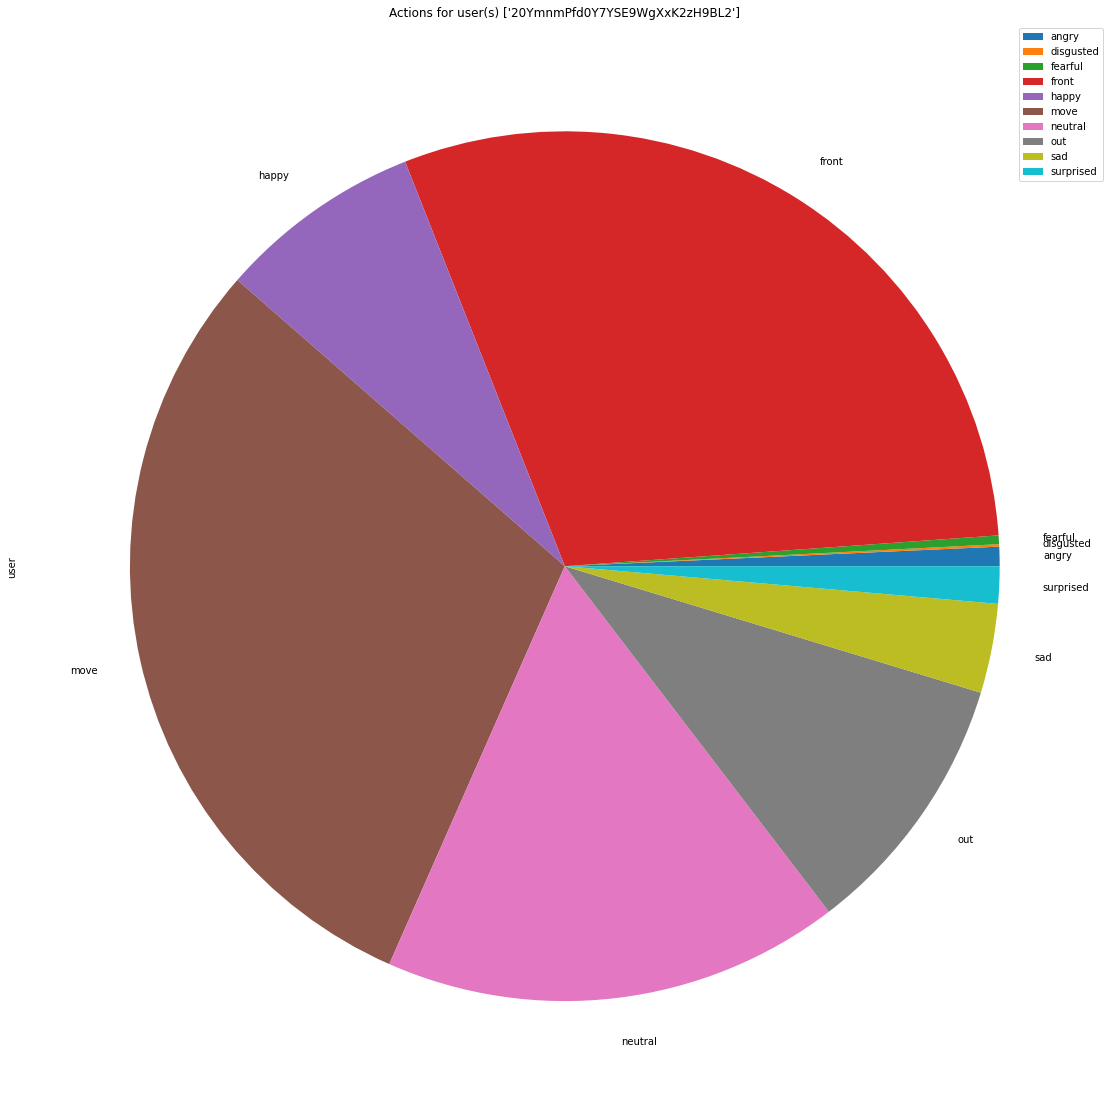

In [20]:
target_.plot.pie(y='user', figsize=(20,20), title=f"Actions for user(s) {target_users}");

### Bar plot

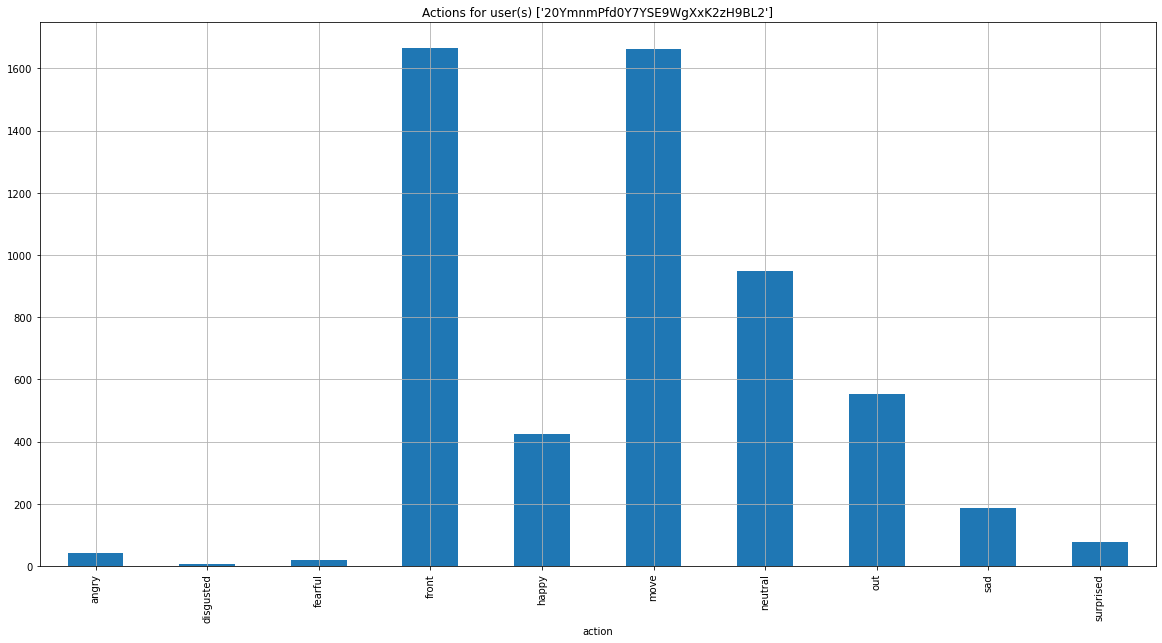

In [21]:
target_['user'].plot(kind='bar', title=f"Actions for user(s) {target_users}", figsize=(20,10), grid=True);

## 5. Inspect sessions

In [22]:
df_ts = df_.set_index('timestamp')

----------------------------------------------------

*Edit the user and session you want to plot*

In [23]:
target_user  = 'L6BaTzTY5AOuDbvyHAkIgAfq6yt1' #one at a time. Check list of users from cell 13.
target_session= 5 #one at a time. Check the list of users from cell 16.

--------------------------------------------------------

In [24]:
#target_emotions= ['front', 'neutral', 'move', 'surprised', 'out', 'sad', 'angry', 'fearful', 'happy', 'disgusted']
target_emotions= ['neutral', 'surprised', 'sad', 'angry', 'fearful', 'happy', 'disgusted']
target_actions= ['start', 'end', 'Theory' 'Practice' 'Doubts', 'NonAcInfo', 'AcInfo']

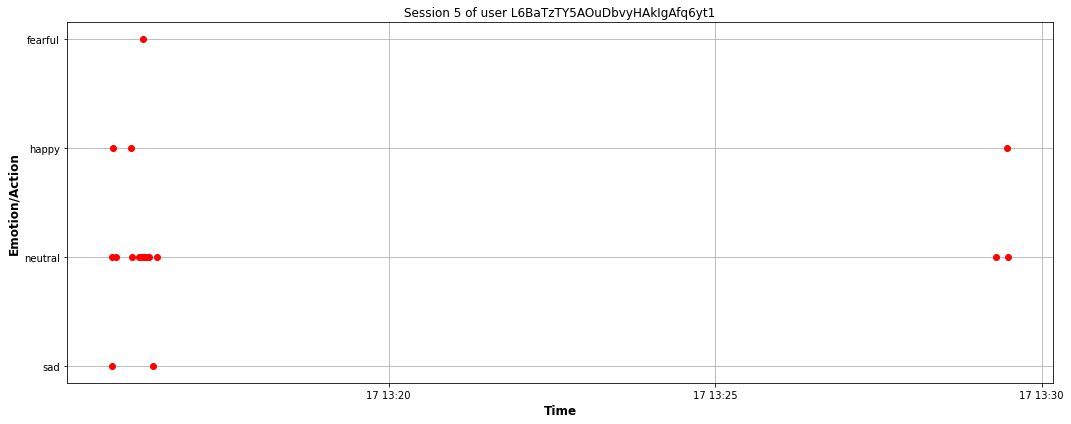

In [25]:
#Emotions
user_ts= df_ts[(df_ts['user']==target_user) & (df_ts['session_id']==target_session) & (df_ts['action'].isin(target_emotions))]
emotions = user_ts['action'].unique()
conversion = {}
i=0
for a in emotions:
    conversion[a]=i
    i+=1
    
y_converted = []
for v in user_ts['action'] :
    y_converted.append(conversion[v])

#Actions
user_act_ts= df_ts[(df_ts['user']==target_user) & (df_ts['session_id']==target_session) & (df_ts['action'].isin(target_actions))]
actions = user_act_ts['action'].unique()
show_actions=False
act_converted = []

if len(actions)>0:
    show_actions=True
    conversion_act = {}
    i=0
    for a in actions:
        conversion_act[a]=i
        i+=1

    for v in user_act_ts['action'] :
        act_converted.append(conversion_act[v])


fig, currAX = plt.subplots(figsize=(15, 6))

label_format = {'fontsize':12, 'fontweight':'bold'}
title_format = {'fontsize':15, 'fontweight':'bold'}

### pass as tuple
currAX.plot(user_ts.index, y_converted, 'ro') #color='crimson', marker='.')

currAX.set_xlabel('Time', **label_format)
currAX.set_ylabel('Emotion/Action', **label_format)

### tell matplotlib the ticks and labels to use on Y-axis
currAX.set_yticks( list(conversion.values()) )
currAX.set_yticklabels( list(conversion.keys()) )

if show_actions:
    currAX2 = currAX.twinx()
    currAX2.plot(user_act_ts.index, act_converted, color='blue', linestyle='-')
    ### tell matplotlib the ticks and labels to use on Y-axis for actions
    currAX2.set_yticks( list(conversion_act.values()) )
    currAX2.set_yticklabels( list(conversion_act.keys()) )

plt.title(f"Session {target_session} of user {target_user}")
plt.grid()

fig.tight_layout()
plt.show();

## 6. Analysis of the distribution of a emotion

*Define the target emotions we want to focus on*

In [26]:
target_emotions= ['neutral','surprised', 'sad', 'angry', 'fearful', 'happy', 'disgusted']

In [27]:
df_.head()

,session_id,timestamp,user,action
3790,0,2020-11-30 01:00:00.450,L6BaTzTY5AOuDbvyHAkIgAfq6yt1,angry
3791,0,2020-11-30 01:00:00.519,L6BaTzTY5AOuDbvyHAkIgAfq6yt1,front
3792,0,2020-11-30 01:00:01.127,L6BaTzTY5AOuDbvyHAkIgAfq6yt1,happy
3793,0,2020-11-30 01:00:01.140,L6BaTzTY5AOuDbvyHAkIgAfq6yt1,move
3794,0,2020-11-30 01:00:01.442,L6BaTzTY5AOuDbvyHAkIgAfq6yt1,front


In [28]:
session_stats_df.head()

,user,session_id,start,end,duration(m)
0,L6BaTzTY5AOuDbvyHAkIgAfq6yt1,0,2020-11-30 01:00:00.450,2020-11-30 01:14:07.382,14.1
1,L6BaTzTY5AOuDbvyHAkIgAfq6yt1,1,2020-11-30 12:50:21.823,2020-11-30 12:59:59.636,9.6
2,L6BaTzTY5AOuDbvyHAkIgAfq6yt1,2,2020-12-12 23:54:49.132,2020-12-12 23:57:35.290,2.8
3,L6BaTzTY5AOuDbvyHAkIgAfq6yt1,3,2020-12-13 01:16:06.411,2020-12-13 02:06:34.117,50.5
4,L6BaTzTY5AOuDbvyHAkIgAfq6yt1,4,2020-12-17 00:52:20.467,2020-12-17 03:18:05.391,145.7


*Select the parameters to generate the plot*

In [29]:
num_of_quantiles= 4
max_session_duration = None #maximum number of minutes to be considered by session (None for dissable this parameter)

In [30]:
emotion_dist_dic = {}
df_2= df_[df_['action'].isin(target_emotions)]
for u in df_2['user'].unique():
    user_df = df_2[df_2['user']==u]
    for s in user_df['session_id'].unique():
        session_df = user_df[user_df['session_id']==s]
        duration = (session_df.iloc[-1]['timestamp'] -session_df.iloc[0]['timestamp']).seconds/60
        if duration > 5:
            start_ = session_df.iloc[0]['timestamp']
                        
            if (max_session_duration is not None) and (max_session_duration > duration):
                duration = max_session_duration
                max_t =  start_ + np.timedelta64(int(max_session_duration),'m')
                session_df= session_df[session_df['timestamp']<= max_t]
                
            
            quantile = duration/num_of_quantiles
            min_threshold= start_
            for nq in range(1,num_of_quantiles+1):
                q = quantile * nq #number of quantile to consider (q1,q2,q3,q4)
                top_threshold = start_ + np.timedelta64(int(q),'m')
                seg_df= session_df[(session_df['timestamp']>=min_threshold) & (session_df['timestamp']<top_threshold)]
                
                #print(duration, quantile, nq, top_threshold,  min_threshold, seg_df)
                
                emotion_dist = seg_df.groupby('action').size()/session_df.groupby('action').size()
                emotion_dist = emotion_dist.dropna().to_dict()
                
                #codigo alternativo para obtener media total considerando todas las emociones
                #emotion_dist= (seg_df.groupby('action').size() /len(session_df)).to_dict()
                
                q_dict = emotion_dist_dic.get(nq,{})
                for k in emotion_dist.keys():
                    l_ = q_dict.get(k,[])
                    l_.append(emotion_dist[k])
                    q_dict[k]= l_
                
                
                emotion_dist_dic[nq]=q_dict
                min_threshold = top_threshold
            

In [31]:
def median(lst):
    sortedLst = sorted(lst)
    lstLen = len(lst)
    index = (lstLen - 1) // 2
   
    if (lstLen % 2):
        return sortedLst[index]
    else:
        return (sortedLst[index] + sortedLst[index + 1])/2.0

In [32]:
norm_emotion_dic = {}
for q, quantile_values in emotion_dist_dic.items():
    norm_quantile_val = norm_emotion_dic.get(q,{})
    for emotion, emotion_values in quantile_values.items():

        #calculamos la mediana
        norm_quantile_val[emotion]=median(emotion_values)
        
        #codigo para obtener la media
        """
        norm_value = sum(emotion_values) /len(emotion_values)
        norm_quantile_val[emotion]= norm_value
        """
    norm_emotion_dic[q]= norm_quantile_val

In [33]:
emotions_evol_df = pd.DataFrame.from_dict(norm_emotion_dic).T

In [34]:
emotions_evol_df

,angry,happy,neutral,sad,surprised,fearful,disgusted
1,0.357143,0.257143,0.258359,0.266129,0.255814,0.351832,0.316667
2,0.285714,0.243169,0.264403,0.245283,0.307692,0.222222,0.416667
3,0.250000,0.271226,0.250000,0.288568,0.252907,0.333333,0.258374
4,0.250000,0.213333,0.221844,0.258824,0.212406,0.623077,0.366667


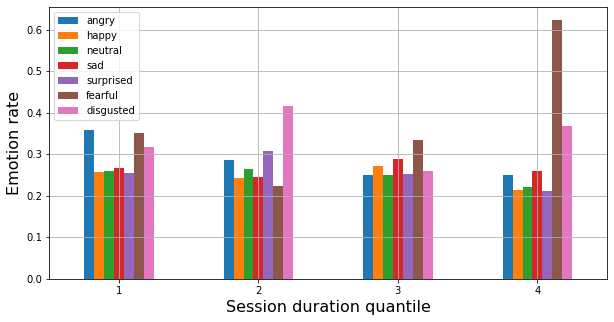

In [37]:
ax=emotions_evol_df.plot(kind='bar', grid=True, figsize=(10,5), rot=0);
ax.set_ylabel('Emotion rate', fontsize=16);
ax.set_xlabel("Session duration quantile", fontsize=16);
plt.legend(loc='upper left');

In [36]:
print("That's all folks")

That's all folks
